# Aula 7 - 27 de abril de 2017

Transformada de Fourier

# Comentários sobre os exercícios entregues

- affine2
    - duas soluções: 
        - indexação dupla, com pontos outside ou inside
        - código anterior, posteriormente zerando pontos outside
- affine_direta
    - duas soluções
        - com clipping, sem necessidade de indexação dupla g[r1,c1] = f
        - condicionante pontos inside ou outside: g[r1[inside],c1[i]]=f[inside]
- ptrans: cuidado na criação da imagem g, o ideal é g = empty_like(f)
- tutorial_conv3
- tutorial_convprop_3

A implementação da convolução do scipy é genérica mas não é mais eficiente que a ia.conv

# Transformada Discreta de Fourier

Funções necessárias:

- iadftmatrix
- iadft
- iaidft
- iadftview
- iafftshift
- iaifftshift
- iaisdftsym
- pconv
- iacos

Demos:

- iadftdecompose
- iacosdemo
- iadftexamples
- iadftmatrixexamples
- iadftscaleproperty 
- iaconvteo

http://adessowiki.fee.unicamp.br/adesso/wiki/courseIA8981S2015/aula7/view/

$$ f(x) = cos (\frac{2 \pi}{N} u x) $$

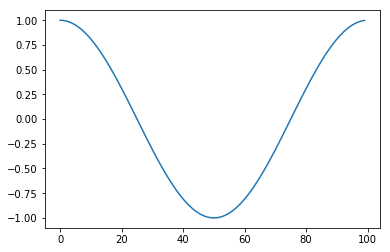

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)
u = 1
f = np.cos(2*np.pi * x * u /N )
plt.plot(f)
#print(f)

## Significado do u na equação

Dado N amostras, o $u$ na equação $ \cos(\frac{2\pi}{N} u x) $ indica o número de ciclos no espaço de 0 a N-1.

Qual é o período, em pixels deste sinal é $\frac{N}{u}$. Lembrar que o período máximo é $N$ e período mínimo é 2.


## Simetria complexo conjugado para função real

Simetria da Transforma de Fourier para imagens no domínio espacial real, a transformada de Fourier
apresenta simetria conjugada, i.e.: $F(u) = F^*(-u)$

## Cossenoides em imagem

$$ f(x,y) = cos(\frac{2\pi}{N}ux + \frac{2\pi}{M}vy) $$

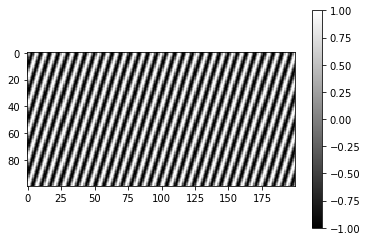

In [16]:
N,M = 100,200
u,v = 5,30
phi = 0
x,y = np.indices((N,M))
f = np.cos(2*np.pi*u*x/N + 2*np.pi*v*y/M + phi)
#print(f)
plt.imshow(f,cmap='gray')
plt.colorbar()

## Visualizando a DFT

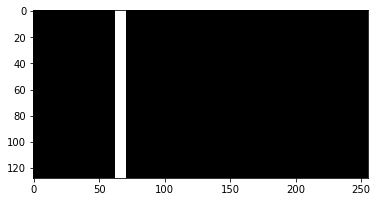

In [13]:
import matplotlib.image as mpimg
from numpy.fft import fft2

f = mpimg.imread('../data/cameraman.tif')
f2 = np.zeros((128, 256))
f2[:,63:63+8] = 1

plt.imshow(f2,cmap='gray')



In [3]:
def ptrans(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g


(8982753+0j)
[[ 8982753.00000000      +0.j           271505.76756225+2299872.86879162j
    550580.12103656 +136066.29645949j ...,
    319143.70991547  -29357.57580833j   550580.12103656 -136066.29645949j
    271505.76756224-2299872.86879163j]
 [  698408.15260295 -512945.7705695j    -33740.50859430-1228144.20953601j
   -704248.06986614 +140053.32794425j ...,
    -60674.04717073 -185408.60114383j   284018.95006431 +371807.45033815j
   -306958.75778268  +14649.51545777j]
 [  503242.33493371 -437130.03022572j  -215293.32954669 -155200.44823699j
   -260067.78232581   +4754.75968097j ...,
     85900.22630329 +117667.07137156j    32871.41985000 +290173.39085134j
    345203.98499988  -17092.25045j   ]
 ..., 
 [ -225839.24674626  +59775.60447638j   -15817.42832556  +89078.44301367j
    111966.95089308 -211801.4258791j  ...,
    273329.16230762 -157082.99129553j  -227581.40954359 -403557.32399017j
   -251279.73381660 +153790.75786034j]
 [  503242.33493371 +437130.03022572j   345203.98499988  +17

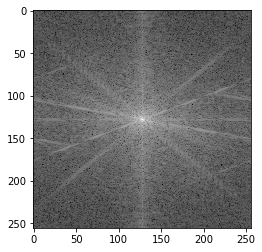

In [12]:
faux = np.ones_like(f) 
f1 = np.zeros_like(f)
f1[0,0]= 1


faux = f
F = fft2(faux)
H,W = faux.shape
#print(np.abs(F))
#plt.figure(figsize=(12,12))
plt.imshow(np.log(np.abs(ptrans(F,(H//2,W//2))+1)),cmap='gray')
print(F[0,0])
print(F)

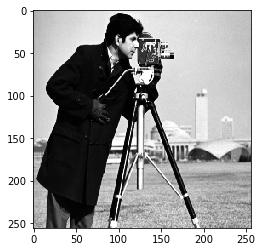

In [14]:
plt.imshow(f,cmap='gray')

# Exercícios

1. Gerar uma demonstração da recontrução parcial cumulativa das "telhas" primitivas de uma imagem sintética como a gerada abaixo. Mostrar cada telha primitiva fazendo a reconstrução da iDFT de apenas valores F(u,0) e F(-u,0) para u entre 0 e M-1.

In [ ]:
f = 50*ones((128,128))
4. f[:,     : 32] = 200
5. f[:,64+32:   ] = 200

In [ ]:
2. Fazer o demo dftscaleproperty

In [ ]:
3. Fazer uma demonstração ilustrativa da propriedade da rotação: dftrotationproperty